In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sms = pd.read_csv("sms.csv",usecols=[0,1])
sms

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
sms.isnull().sum()

,0
Label,0
Message,0


In [4]:
sms.duplicated().sum()

np.int64(403)

In [5]:
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True,inplace=True)
sms.duplicated().sum()

np.int64(0)

In [6]:
sms.shape

(5169, 2)

In [7]:
sms["Label"].value_counts(normalize=True)*100

,proportion
Label,
ham,87.366996
spam,12.633004


([<matplotlib.patches.Wedge at 0x79b8d7a45f10>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

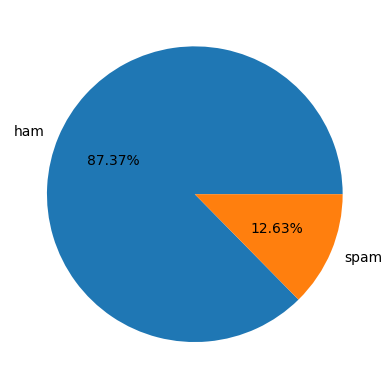

In [8]:
plt.pie(sms["Label"].value_counts()*100,labels=["ham","spam"],autopct="%1.2f%%")

In [9]:
mail = pd.read_csv("emails.csv")
mail =mail[["label_num","Message"]]
mail

,label_num,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,0,Subject: calpine daily gas nomination\r\n>\r\n...
5169,0,Subject: industrial worksheets for august 2000...


In [10]:
mail.isnull().sum()

,0
label_num,0
Message,0


In [11]:
mail.duplicated().sum()

np.int64(178)

In [12]:
mail.drop_duplicates(inplace=True)
mail.reset_index(drop=True,inplace=True)
mail.duplicated().sum()

np.int64(0)

In [13]:
mail["label_num"].value_counts(normalize=True)*100


,proportion
label_num,
0,70.719007
1,29.280993


([<matplotlib.patches.Wedge at 0x79b8d869b110>,
 [Text(-0.6664987851717366, 0.8750882066195381, 'ham'),
  Text(0.6664990703116317, -0.8750879894466217, 'spam')],
 [Text(-0.36354479191185624, 0.4773208399742935, '70.72%'),
  Text(0.36354494744270816, -0.47732072151633903, '29.28%')])

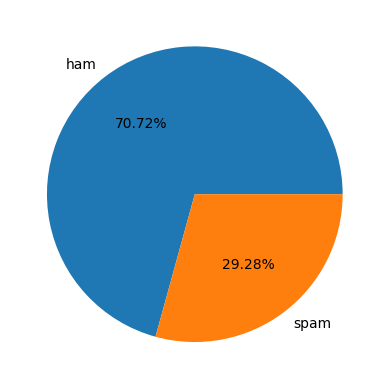

In [14]:
plt.pie(mail["label_num"].value_counts()*100,labels=["ham","spam"],autopct="%1.2f%%")

In [15]:
mail["label_num"]
mail.rename(columns={"label_num":"Label"},inplace=True)

In [16]:
sms["Label"]= sms["Label"].map({"ham":0,"spam":1})

In [17]:
mergeData = pd.concat([sms,mail],axis=0,ignore_index=True)
mergeData

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10157,0,"Subject: fw : crosstex energy , driscoll ranch..."
10158,0,Subject: put the 10 on the ft\r\nthe transport...
10159,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160,0,Subject: industrial worksheets for august 2000...


In [18]:
mergeData["Label"].value_counts(normalize=True)*100

,proportion
Label,
0,79.187168
1,20.812832


In [19]:
mergeData.to_csv("Messages.csv",index=False)

In [20]:
import pandas as pd
import re
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

**preprocessing** *

In [21]:
Messages =pd.read_csv("Messages.csv")
Messages

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10157,0,"Subject: fw : crosstex energy , driscoll ranch..."
10158,0,Subject: put the 10 on the ft\r\nthe transport...
10159,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160,0,Subject: industrial worksheets for august 2000...


In [22]:
data =Messages["Message"]
data

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
10157,"Subject: fw : crosstex energy , driscoll ranch..."
10158,Subject: put the 10 on the ft\r\nthe transport...
10159,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10160,Subject: industrial worksheets for august 2000...


In [23]:
import nltk

# Download the required resources(if face any error buddy )
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
def preprocessor(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  #tokenization
  words = text.split()

  #stop word removal and lemmatization
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  words_without_stopwords = [i for i in words if i not in stop_words]
  lemmatizer_words =[lemmatizer.lemmatize(i) for i in words_without_stopwords]

  return " ".join(lemmatizer_words)

Messages["preprocess_messages"] = Messages["Message"].apply(preprocessor)


In [25]:
Messages["preprocess_messages"]

,preprocess_messages
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think go usf life around though
...,...
10157,subject fw crosstex energy driscoll ranch 1 3 ...
10158,subject put 10 ft transport volume decreased 2...
10159,subject 3 4 2000 following noms hpl take extra...
10160,subject industrial worksheet august 2000 activ...


**Feature Extraction using TF-IDF**

In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Messages["preprocess_messages"]).toarray()

In [27]:
print(type(X))
X.shape

<class 'numpy.ndarray'>


(10162, 52453)

In [28]:
print("TF-IDF matrix (sample):")
print(X) # Convert to dense array for viewing the first 3 rows



TF-IDF matrix (sample):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13659004 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
y=Messages["Label"]
y

,Label
0,0
1,0
2,1
3,0
4,0
...,...
10157,0
10158,0
10159,0
10160,0


Model training , select best models

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7113, 52453), (3049, 52453), (7113,), (3049,))

## Select the best model
- so here we have some list of the best text classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others
 - SVM
 - MultinomialNB
 - GaussianNB

In [31]:
def model_selection(X,y,models):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  Models=[]
  scores=[]

  for model in models:
    model.fit(x_train,y_train)
    y_pred =model.predict(x_test)
    score= accuracy_score(y_test,y_pred)
    scores.append(score)
    Models.append(model)
    print(f"{model} : {score}")

  report =pd.DataFrame()
  report["Models"]=Models
  report["Scores"]=scores
  return report


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB ,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models=[SVC(),MultinomialNB(),GaussianNB()]
report= model_selection(X,y,models)


In [ ]:
report.sort_values(by="Scores",ascending=False)

- ### From the report above we can see that the Gaussian Naive Bayes model performed the best, so we will continue training our model using Gaussian Naive Bayes algorithm.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

###  Gaussian Naive Bayes Classifier

There is one hyperparameter we need to tune: **`var_smoothing`**. This is the **portion of the largest variance** of all features that is added to variances for **calculation stability**.

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import sklearn.model_selection as GridSearchCV

params = {'var_smoothing': np.random.exponential(.000000001,20)}
print("parameters :",params)
gnb_model = GaussianNB()
gnb_cv = GridSearchCV(gnb_model, params, cv = 10,score=["precision"])
gnb_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",gnb_cv.best_params_)
print("accuracy :",gnb_cv.best_score_)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

spam_detect_model = GaussianNB(**gnb_cv.best_params_)
spam_detect_model.fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model is {accuracy}")
print(f"The confusion matrix is: \n{confusion_m}")



In [ ]:


# 1. Sample Data (replace with your actual dataset)
# Imagine this is a column from your DataFrame
documents = [
    "You have won a free lottery prize! Click here to claim.",
    "Hey John, remember to pick up some groceries later.",
    "Congratulations! Your account has been credited with $10,000.",
    "Just a quick reminder about our meeting tomorrow.",
    "Hello, this is a legitimate message from your bank. We need your login details.",
    "This is a personal message from me, your friend. Hope you're doing well.",
    "URGENT: Your account will be closed if you don't respond immediately."
]

# 2. Preprocessing Function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and numbers
    # text = re.sub(r'[^a-zA-Z\s]', '', text)

    #removeonly character
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)


    # Tokenization
    words = text.split()

    # Stop word removal and lemmatization
    stop_words = set(stopwords.words('english'))
    print(stop_words)
    lemmatizer = WordNetLemmatizer()

    processed_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words
    ]

    return " ".join(processed_words)

# 3. Apply the preprocessing to your documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

print("Original Documents:")
for doc in documents:
    print(f"- {doc}")

print("\nPreprocessed Documents:")
for doc in preprocessed_documents:
    print(f"- {doc}")

# 4. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_documents)

# The result is a sparse matrix, which is memory-efficient
print("\nShape of TF-IDF matrix (documents x vocabulary size):", X.shape)
print("TF-IDF matrix (sample):")
print(X.toarray()[:3]) # Convert to dense array for viewing the first 3 rows

# You can also inspect the vocabulary
print("\nVocabulary (top 10 features):")
print(vectorizer.get_feature_names_out()[:10])

# Example of using the vectorizer for a new, single document
new_doc = ["claim your free gift now!"]
preprocessed_new_doc = preprocess_text(new_doc[0])
new_doc_tfidf = vectorizer.transform([preprocessed_new_doc])
print("\nTF-IDF vector for a new document:")
print(new_doc_tfidf.toarray())